# 2. Numerical integration exercises

In [42]:
import sympy as sy
import numpy as np
import scipy as sp
import math
from scipy import stats as st
from matplotlib import pyplot as plt

### Exercise 2.1

In [35]:
def integration(g, a, b, N, method):
    true_int = sy.integrate(g, (x, a, b))  # the true integration
    
    if 'midpoint' in method:  # use composite midpoint rule
        midpoint_int = 0 
        for i in range(N):
            x_i = a + ((2 * i + 1) * (b - a)) / (2 * N)
            midpoint_int += g.evalf(subs={x:x_i})
        midpoint_int *= (b - a) / N

    if 'trapezoid' in method:  # use composite trapezoid rule
        trapezoid_int = 0
        for i in range(N+1):
            x_i = a + i * (b - a) / N
            if i == 0:
                trapezoid_int += g.evalf(subs={x:x_i})
            elif i == N:
                trapezoid_int += g.evalf(subs={x:x_i})
            else:
                trapezoid_int += 2 * g.evalf(subs={x:x_i})
        trapezoid_int *= (b - a) / (2 * N)
    
    if 'Simpsons' in method:  # use composite Simpsons' rule
        simpsons_int = 0
        for i in range(2*N+1):
            x_i = a + i * (b - a) / (2 * N)
            if i == 0 :
                simpsons_int += g.evalf(subs={x:x_i})
            elif i == 2 * N:
                simpsons_int += g.evalf(subs={x:x_i})
            elif i % 2 != 0:
                simpsons_int += 4 * g.evalf(subs={x:x_i})
            else:
                simpsons_int += 2 * g.evalf(subs={x:x_i})
        simpsons_int *= (b - a) / (6 * N)
    
    diff_midpoint = abs(midpoint_int - true_int)
    diff_trapezoid = abs(trapezoid_int - true_int)
    diff_simpsons = abs(simpsons_int - true_int)
    
    return diff_midpoint, diff_trapezoid, diff_simpsons

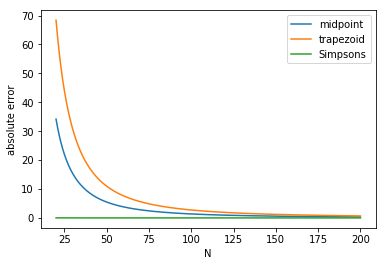

In [37]:
x = sy.symbols('x')
g = 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
gx = sy.lambdify(x, g)

a = -10
b = 10
method = {'midpoint', 'trapezoid', 'Simpsons'}
error_mp = []
error_tp = []
error_sp = []
Nvec = np.arange(20, 201, 1)
for N in Nvec:
    mp, tp, sp = integration(g, a, b, N, method)
    error_mp.append(mp)
    error_tp.append(tp)
    error_sp.append(sp)

# plot
Nvec = np.arange(20, 201, 1)
plt.plot(Nvec, error_mp, label='midpoint')
plt.plot(Nvec, error_tp, label='trapezoid')
plt.plot(Nvec, error_sp, label='Simpsons')
plt.xlabel('N')
plt.ylabel('absolute error')
plt.legend()
plt.show()


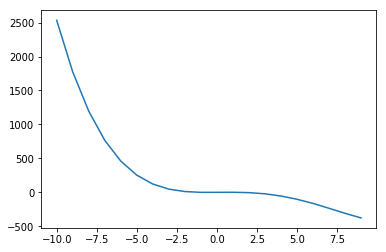

In [38]:
x_vec = np.arange(-10, 10)
plt.clf()
plt.plot(x_vec, gx(x_vec))
plt.show()

From this graph, we can tell that because g(x) changes very fase when x increases to 10 from -10.
So more points to rely on, the approximation should be more accurate.

### Exercise 2.2

In [5]:
def newton_cotes(mean, sd, N, k):
    Z = np.linspace(mean - sd * k, mean + sd * k, N)   # generally N equally spaced node
    w = []
    w_i = 0.0
    for i in range(0, N):
        if i == 1:
            w_i = st.norm.cdf((Z[i]+Z[i+1])/2, mean, sd)
        elif i == N-1:
            w_i = 1 - st.norm.cdf((Z[i-1]+Z[i])/2, mean, sd)
        else:
            w_i = st.norm.cdf((Z[i]+Z[i+1])/2, mean, sd) - st.norm.cdf((Z[i-1]+Z[i])/2, mean, sd)
        w.append(w_i)
    return Z, w

In [6]:
mean = 5
sd = 1.5
N = 11
k = 3

Z, w = newton_cotes(mean, sd, N, k)

print("The nodes are: {}".format(Z))
print("The weights are: {}".format(w))

The nodes are: [0.5 1.4 2.3 3.2 4.1 5.  5.9 6.8 7.7 8.6 9.5]
The weights are: [-0.4965330261969593, 0.017864420562816542, 0.04894278070604153, 0.1172529240779014, 0.19802845246428785, 0.23582284437790535, 0.1980284524642878, 0.11725292407790144, 0.04894278070604152, 0.014397446759775945, 0.0034669738030406183]


### Exercise 2.3

In [7]:
def lognormal(mean, sd, N, k):
    Z, w = newton_cotes(mean, sd, N, k)
    A = np.exp(Z)
    return A, w

In [8]:
mean = 5
sd = 1.5
N = 11
k = 3

Z, w = lognormal(mean, sd, N, k)

print("The nodes are: {}".format(Z))
print("The weights are: {}".format(w))

The nodes are: [1.64872127e+00 4.05519997e+00 9.97418245e+00 2.45325302e+01
 6.03402876e+01 1.48413159e+02 3.65037468e+02 8.97847292e+02
 2.20834799e+03 5.43165959e+03 1.33597268e+04]
The weights are: [-0.4965330261969593, 0.017864420562816542, 0.04894278070604153, 0.1172529240779014, 0.19802845246428785, 0.23582284437790535, 0.1980284524642878, 0.11725292407790144, 0.04894278070604152, 0.014397446759775945, 0.0034669738030406183]


### Exercise 2.4

In [9]:
def approx(mean, sd, N, k):
    # calculate the approximation using function from Ex.2.3
    A, w = lognormal(mean, sd, N, k)
    approx = sum(A*w)
    return approx

def exact(mean, sd, N, k):
    # calculate the exact value 
    exact = sy.exp(mean + sd**2/2)
    return exact

In [10]:
mean = 10.5
sd = 0.8
N = 11
k = 3

approx = approx(mean, sd, N, k)
exact = exact(mean, sd, N, k)
difference = exact - approx

print("My approximation is {}, and the exact expected value is {}. Their difference is {}.".format(approx, exact, difference))

My approximation is 48723.68068950486, and the exact expected value is 50011.0870085218. Their difference is 1287.40631901690.


### Exercise 3.1

In [43]:
# Approximate the integral using Gaussian quadrature with 𝑁=3
# ℎ_𝑖(𝑥)=𝑥**𝑖
def funct(x0, N):
    functs = []
    w = x0[:N]
    x = x0[N:]
    for i in range(2*N):
        f = 0
        for j in range(N):
            f += w[j] * (x[j] ** i)
        f = (1 / (i + 1)) * (b ** (i + 1) - a ** (i + 1)) - f 
        functs.append(f)
    return functs
    
def gaussian(N, a, b, g):
    w_init = [1 / N for i in range(N)]
    x_init = [0 for i in range(N)]
    initial_guess = w_init + x_init
    root = sp.optimize.root(funct, initial_guess, N).x
    w = root[:N]
    x = root[N:]
    integral = 0
    for j in range(N):
        integral += w[j] * g(x[j])
    return integral

In [44]:
x = sy.symbols('x')
g = 0.1 * x ** 4 + (-1.5) * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
gx = sy.lambdify(x, g)

N = 3
a = -10
b = 10

gauss = gaussian(N, a, b, gx)
gauss

4373.333334806006

In [45]:
# This value comes from Exercise 2.1
true = 4373 + (1 / 3)
error_gauss = abs(true - gauss)
error_gauss

1.4726729204994626e-06

In [46]:
method = {'midpoint', 'trapezoid', 'Simpsons'}
integration(g, N, a, b, method)

(58.6248395416660, 117.342502333333, 0.0309410833342554)

We know the absolute errors for midpoint rule, trapezoid rule, and Simpsons' rule are 58.625, 117.343 and 0.0309, respectively. So this approximated integral is more accurate than the approximations using the midpoint rule, trapezoid rule, and Simpson's rule. The approximated integral using Gaussian quadrature is nearly the same as the true analytical value of the integral.

### Exercise 3.2

In [48]:
g_x = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
sp.integrate.quad(g_x, -10, 10)

(4373.333333333334, 8.109531705284936e-11)

In [49]:
sy.integrate(g, (x, -10, 10))  # the analytical value

4373.33333333333

In [51]:
# difference between this approximated valued and the analytical value 
sp.integrate.quad(g_x, -10, 10)[0] - sy.integrate(g, (x, -10, 10))

1.81898940354586e-12

Compared the approximated integral with the analytical value of the integral, we can tell that they are nearly the same, and the difference is too small to be recognized.

### Exercise 4.1

In [67]:
np.random.seed(25)

def Monte_Carlo(g, Omega, N):
    x_l, x_u = Omega[0]
    y_l, y_u = Omega[1]
    x = np.random.uniform(x_l, x_u, N)
    y = np.random.uniform(y_l, y_u, N)
    pt_count = 0
    for i in range(N):
        if g(x[i], y[i]) <= 1:
            pt_count += 1
    area = (x_u - x_l) * (y_u - y_l)
    return (pt_count / N) * area

In [68]:
N = 1
x = sy.symbols('x')
y = sy.symbols('y')
g = lambda x, y: x ** 2 + y ** 2
Omega = np.array([[-1, 1], [-1, 1]])

while round(Monte_Carlo(g, Omega, N), 4) != 3.1415:
    N += 1
print("The smallest number of random draws N should be {}".format(N))

The smallest number of random draws N should be 615


### Exercise 4.2

In [54]:
# These functions come from the notebook of numerical integration
def isPrime(n):
    '''
    --------------------------------------------------------------------
    This function returns a boolean indicating whether an integer n is a
    prime number
    --------------------------------------------------------------------
    INPUTS:
    n = scalar, any scalar value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    i = integer in [2, sqrt(n)]

    FILES CREATED BY THIS FUNCTION: None

    RETURN: boolean
    --------------------------------------------------------------------
    '''
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True


def primes_ascend(N, min_val=2):
    '''
    --------------------------------------------------------------------
    This function generates an ordered sequence of N consecutive prime
    numbers, the smallest of which is greater than or equal to 1 using
    the Sieve of Eratosthenes algorithm.
    (https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
    --------------------------------------------------------------------
    INPUTS:
    N       = integer, number of elements in sequence of consecutive
              prime numbers
    min_val = scalar >= 2, the smallest prime number in the consecutive
              sequence must be greater-than-or-equal-to this value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        isPrime()

    OBJECTS CREATED WITHIN FUNCTION:
    primes_vec     = (N,) vector, consecutive prime numbers greater than
                     min_val
    MinIsEven      = boolean, =True if min_val is even, =False otherwise
    MinIsGrtrThn2  = boolean, =True if min_val is
                     greater-than-or-equal-to 2, =False otherwise
    curr_prime_ind = integer >= 0, running count of prime numbers found

    FILES CREATED BY THIS FUNCTION: None

    RETURN: primes_vec
    --------------------------------------------------------------------
    '''
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In [55]:
def equi_sequence(n, d, sequence):
    primes = primes_ascend(d, min_val=2)
    if sequence == 'Weyl':
        weyl = n * np.sqrt(primes) - np.floor(n * np.sqrt(primes))
        return weyl
    if sequence == 'Haber':
        haber = (n * (n + 1) / 2) * np.sqrt(primes) - np.floor((n * (n + 1) / 2) * np.sqrt(primes))
        return haber
    if sequence == "Niederreiter":
        k = [i / (i + 1) for i in range(1, d+1)]
        niederreiter = n * np.power(2, k) - np.floor(n * np.power(2, k))
        return niederreiter
    if sequence == "Baker":
        r = [1 / j for j in range(1, d+1)]
        baker = n * np.exp(r) - np.floor(n * np.exp(r)) 
        return baker

In [56]:
n = 20
d = 5

print("Weyl: {}".format(equi_sequence(n, d, 'Weyl')))
print("Haber: {}".format(equi_sequence(n, d, 'Haber')))
print("Niederreiter: {}".format(equi_sequence(n, d, 'Niederreiter')))
print("Baker: {}".format(equi_sequence(n, d, 'Baker')))

Weyl: [0.28427125 0.64101615 0.72135955 0.91502622 0.33249581]
Haber: [0.9848481  0.73066959 0.57427527 0.60777532 0.49120597]
Niederreiter: [0.28427125 0.74802104 0.63585661 0.82202253 0.63594873]
Baker: [0.36563657 0.97442541 0.9122485  0.68050833 0.42805516]


### Exercise 4.3

In [69]:
np.random.seed(seed=25)

def quasi_MC(g, Omega, N, sequence):
    x_l, x_u = Omega[0]
    y_l, y_u = Omega[1]
    if sequence == "Weyl":
        x = [(x_u - x_l) * equi_sequence(i, 2, 'Weyl')[0] - 1 for i in range(1, N+1)]
        y = [(y_u - y_l) * equi_sequence(i, 2, 'Weyl')[1] - 1 for i in range(1, N+1)]
    if sequence == "Haber":
        x = [(x_u - x_l) * equi_sequence(i, 2, 'Haber')[0] - 1 for i in range(1, N+1)]
        y = [(y_u - y_l) * equi_sequence(i, 2, 'Haber')[1] - 1 for i in range(1, N+1)]
    if sequence == "Niederreiter":
        x = [(x_u - x_l) * equi_sequence(i, 2, 'Niederreiter')[0] - 1 for i in range(1, N+1)]
        y = [(y_u - y_l) * equi_sequence(i, 2, 'Niederreiter')[1] - 1 for i in range(1, N+1)]
    if sequence == "Baker":
        x = [(x_u - x_l) * equi_sequence(i, 2, 'Baker')[0] - 1 for i in range(1, N+1)]
        y = [(y_u - y_l) * equi_sequence(i, 2, 'Baker')[1] - 1 for i in range(1, N+1)]
    pt_count = 0
    for i in range(N):
        if g(x[i], y[i]) <= 1:
            pt_count += 1
    area = (x_u - x_l) * (y_u - y_l)
    return (pt_count / N) * area

In [70]:
x = sy.symbols('x')
y = sy.symbols('y')
g = lambda x, y: x ** 2 + y ** 2
Omega = np.array([[-1, 1], [-1, 1]])

N = 1
while round(quasi_MC(g, Omega, N, 'Weyl'), 4) != 3.1415:
    N += 1
print("The smallest number of random draws N of Weyl should be {}".format(N))

The smallest number of random draws N of Weyl should be 1244


In [71]:
N = 1
while round(quasi_MC(g, Omega, N, 'Haber'), 4) != 3.1415:
    N += 1
print("The smallest number of random draws N of Haber should be {}".format(N))

The smallest number of random draws N of Haber should be 2078


In [72]:
N = 1
while round(quasi_MC(g, Omega, N, 'Niederreiter'), 4) != 3.1415:
    N += 1
print("The smallest number of random draws N of Niederreiter should be {}".format(N))

The smallest number of random draws N of Niederreiter should be 643


In [73]:
N = 1
while round(quasi_MC(g, Omega, N, 'Baker'), 4) != 3.1415:
    N += 1
print("The smallest number of random draws N of Baker should be {}".format(N))

The smallest number of random draws N of Baker should be 205


Compare the rates of convergence (from faster to slower):
    Baker, Niederreiter, Weyl, Haber